In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# funciones desarrolladas
from functions.cargar_data import *
from functions.modelos import *
from functions.graficas import plot_gt

In [2]:
# carga datos diádicos
dd_deptos = cargar_dd_deptos()
print(dd_deptos.columns)
dd_deptos.head(2)

Index(['cod', 'depto_origen', 'depto_destino', 'personas_mig',
       'personas_mig_18_25', 'personas_mig_26_35', 'personas_mig_100k',
       'pob_origen', 'pob_destino', 'dist', 'dist_km', 'pbi_origen',
       'pbi_porcen_ori', 'pbi_destino', 'pbi_porcen_des',
       'pbi_origen_millardos', 'pbi_destino_millardos', 'largo_limite',
       'dummy_limit', 'empresas_origen', 'empresas_destino', 'log_pbi_destino',
       'log_dist', 'nom_depto_orig', 'nom_depto_des', 'largo_limite_km'],
      dtype='object')


,cod,depto_origen,depto_destino,personas_mig,personas_mig_18_25,personas_mig_26_35,personas_mig_100k,pob_origen,pob_destino,dist,...,pbi_destino_millardos,largo_limite,dummy_limit,empresas_origen,empresas_destino,log_pbi_destino,log_dist,nom_depto_orig,nom_depto_des,largo_limite_km
0,102,1,2,914,114,247,891,1318755,73377,610726,...,14.215,0.0001,False,3124,55,16.469807,13.322404,MONTEVIDEO,ARTIGAS,1.000000e-07
1,103,1,3,33127,3757,7904,0,1318755,520173,22544,...,86.306,60107.0000,True,3124,563,18.273415,10.023224,MONTEVIDEO,CANELONES,6.010700e+01


## Modelos con Montevideo

### 1. Modelo 1: dummy limit, largo límite, PBI destino y distancia

In [34]:
# define el string tomado como fórmula
formula = """
personas_mig ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

# entrena y ajusta el modelo
f = sm.families.Poisson()
prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  342
Model:                            GLM   Df Residuals:                      319
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29038.
Date:                Sat, 28 Aug 2021   Deviance:                       55848.
Time:                        14:57:45   Pearson chi2:                 7.54e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            5.2793      0.023    231.227      0.000       5.235       5.324
nom_depto_orig[T.CANELONES]         -0.5123      0.019    -27.131      0.000      -0.549      -0.475
nom_depto_orig[T.CERRO LARGO]       -0.5881      0.021    -28.296      0.000      -0.629      -0.547
nom_depto_orig[T.COLONIA]           -0.6376      0.022    -29.155      0.000      -0.680      -0.595
nom_depto_orig[T.DURAZNO]           -1.0824      0.023    -47.979      0.000      -1.127      -1.038
nom_depto_orig[T.FLORES]            -1.9232      0.030    -64.256      0.000      -1.982      -1.865
nom_depto_orig[T.FLORIDA]           -1.1011      0.023    -48.112      0.000      -1.146      -1.056
nom_depto_orig[T.LAVALLEJA]         -1.1843      0.023    -50.425      0.000      -1.230      -1.138
nom_depto_orig[T.MALDONADO]         -0.5163      0.021    -24.374      0.000      -0.558      -0.475
nom_depto_orig[T.MONTEVIDEO]         2.5481      0.018    141.483      0.000       2.513       2.583
nom_depto_orig[T.PAYSANDU]          -0.5085      0.020    -24.943      0.000      -0.548      -0.469
nom_depto_orig[T.RIO NEGRO]         -1.0458      0.023    -45.756      0.000      -1.091      -1.001
nom_depto_orig[T.RIVERA]            -0.3480      0.020    -17.230      0.000      -0.388      -0.308
nom_depto_orig[T.ROCHA]             -0.8793      0.023    -38.362      0.000      -0.924      -0.834
nom_depto_orig[T.SALTO]             -0.3714      0.020    -18.842      0.000      -0.410      -0.333
nom_depto_orig[T.SAN JOSE]          -1.7727      0.024    -75.341      0.000      -1.819      -1.727
nom_depto_orig[T.SORIANO]           -0.6577      0.021    -30.929      0.000      -0.699      -0.616
nom_depto_orig[T.TACUAREMBO]        -0.5603      0.020    -28.373      0.000      -0.599      -0.522
nom_depto_orig[T.TREINTA Y TRES]    -1.0858      0.023    -46.618      0.000      -1.131      -1.040
dummy_limit[T.True]                  1.2424      0.010    125.410      0.000       1.223       1.262
largo_limite_km                      0.0028   7.75e-05     36.539      0.000       0.003       0.003
pbi_destino_millardos                0.0073   1.84e-05    398.577      0.000       0.007       0.007
dist_km                             -0.0016   3.14e-05    -50.900      0.000      -0.002      -0.002
====================================================================================================
"""

$R²$ = 0.1593

RMSE = 1785.2257

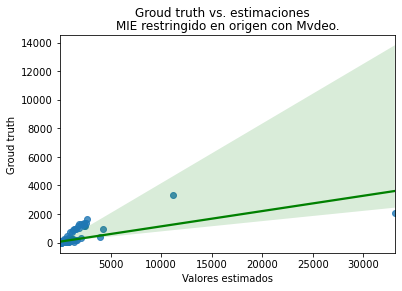

In [30]:
actual_counts = dd_deptos.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

In [6]:
prodSim.save("modelos/restringido_origen_mvo.pickle")

$R²$ = 0.8987

RMSE = 110.7891

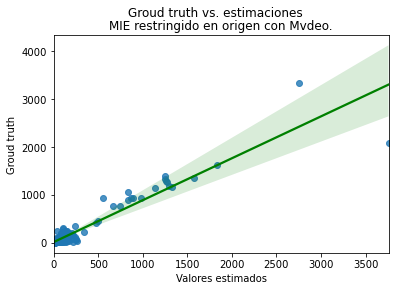

In [29]:
# define el string tomado como fórmula
formula = """
personas_mig_18_25 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

# entrena y ajusta el modelo
prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_18_25
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

## Modelo sin Montevideo

In [32]:
dd_deptos_no_mvo = dd_deptos.loc[(dd_deptos.depto_origen!=1) & (dd_deptos.depto_destino!=1)]

In [35]:
# define el string tomado como fórmula
formula = """
personas_mig ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km -1
"""

# entrena y ajusta el modelo
prodSim = smf.glm(formula=formula, data=dd_deptos_no_mvo, family=f).fit()

# resultados
prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  306
Model:                            GLM   Df Residuals:                      284
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6428.2
Date:                Sat, 28 Aug 2021   Deviance:                       10963.
Time:                        14:57:48   Pearson chi2:                 1.33e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]            4.6410      0.035    131.901      0.000       4.572       4.710
nom_depto_orig[CANELONES]          5.3478      0.023    234.964      0.000       5.303       5.392
nom_depto_orig[CERRO LARGO]        4.3362      0.032    136.803      0.000       4.274       4.398
nom_depto_orig[COLONIA]            4.0849      0.029    139.446      0.000       4.027       4.142
nom_depto_orig[DURAZNO]            3.8031      0.030    125.645      0.000       3.744       3.862
nom_depto_orig[FLORES]             3.0402      0.039     78.332      0.000       2.964       3.116
nom_depto_orig[FLORIDA]            3.8096      0.029    129.217      0.000       3.752       3.867
nom_depto_orig[LAVALLEJA]          3.6892      0.031    118.105      0.000       3.628       3.750
nom_depto_orig[MALDONADO]          4.4990      0.028    162.555      0.000       4.445       4.553
nom_depto_orig[PAYSANDU]           4.2360      0.030    142.231      0.000       4.178       4.294
nom_depto_orig[RIO NEGRO]          3.8846      0.031    125.257      0.000       3.824       3.945
nom_depto_orig[RIVERA]             4.3583      0.034    129.038      0.000       4.292       4.424
nom_depto_orig[ROCHA]              4.0236      0.032    126.265      0.000       3.961       4.086
nom_depto_orig[SALTO]              4.3463      0.033    133.534      0.000       4.283       4.410
nom_depto_orig[SAN JOSE]           3.9177      0.029    132.903      0.000       3.860       3.975
nom_depto_orig[SORIANO]            4.1556      0.028    146.815      0.000       4.100       4.211
nom_depto_orig[TACUAREMBO]         4.2071      0.031    134.475      0.000       4.146       4.268
nom_depto_orig[TREINTA Y TRES]     3.9987      0.031    128.422      0.000       3.938       4.060
dummy_limit[T.True]                0.1643      0.019      8.846      0.000       0.128       0.201
largo_limite_km                    0.0072      0.000     59.921      0.000       0.007       0.007
pbi_destino_millardos              0.0300      0.000    159.150      0.000       0.030       0.030
dist_km                           -0.0017   5.84e-05    -29.148      0.000      -0.002      -0.002
==================================================================================================
"""

$R²$ = 0.7562

RMSE = 101.3652

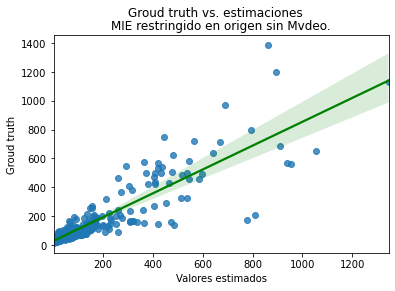

In [36]:
actual_counts = dd_deptos_no_mvo.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)


subtitle = 'MIE restringido en origen sin Mvdeo.'
plot_gt(actual_counts, predicted_counts, title, subtitle)

In [11]:
prodSim.save("modelos/restringido_origen_noMVO.pickle")